# **studi kasus one way**

Masalah: Seorang guru ingin mengetahui apakah ada perbedaan rata-rata nilai
ujian dari tiga kelas berbeda (Kelas A, Kelas B, dan Kelas C). Nilai ujian dari
tiap kelas dicatat dan diuji dengan ANOVA.


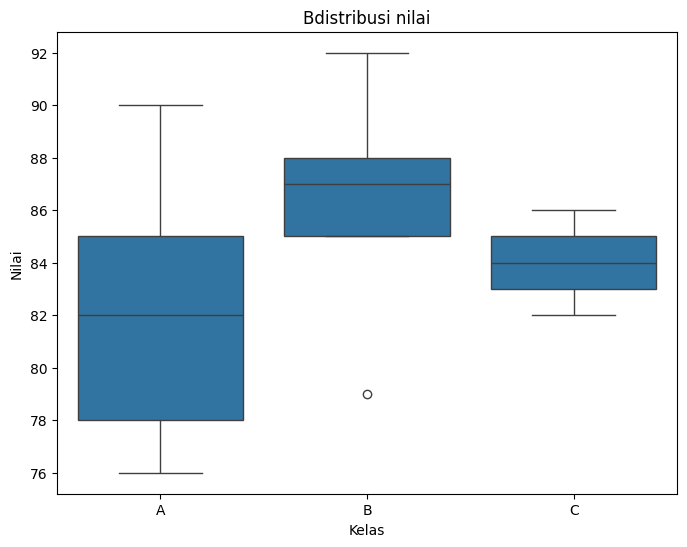

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Nilai ujian dari tiga kelas
kelas_A = [78, 85, 82, 90, 76]
kelas_B = [88, 79, 92, 85, 87]
kelas_C = [84, 83, 85, 86, 82]
df = pd.DataFrame({
    'Nilai': kelas_A + kelas_B + kelas_C,
    'Kelas': ['A']*len(kelas_A) + ['B']*len(kelas_B) + ['C']*len(kelas_C)
})


plt.figure(figsize=(8, 6))
sns.boxplot(x='Kelas', y='Nilai', data=df)
plt.title('Bdistribusi nilai')
plt.xlabel('Kelas')
plt.ylabel('Nilai')
plt.show()


In [11]:
# Statistik deskriptif per kelompok
df.groupby('Kelas').describe()

Nilai                                              
      count  mean       std   min   25%   50%   75%   max
Kelas                                                    
A       5.0  82.2  5.585696  76.0  78.0  82.0  85.0  90.0
B       5.0  86.2  4.764452  79.0  85.0  87.0  88.0  92.0
C       5.0  84.0  1.581139  82.0  83.0  84.0  85.0  86.0

# **Uji ANOVA**

Menggunakan fungsi f_oneway dari scipy.stats, kita menghitung:

F-value: Statistik uji ANOVA

P-value: Probabilitas bahwa perbedaan rata-rata antar kelompok terjadi secara kebetulan

Interpretasi:

Jika p-value < 0.05, maka terdapat perbedaan signifikan secara statistik di antara kelompok.

In [12]:
# Lakukan uji ANOVA satu arah
f_value, p_value = stats.f_oneway(kelas_A, kelas_B, kelas_C)

print(f"F-Value (Statistik ANOVA): {f_value:.4f}")
print(f"P-Value: {p_value:.4f}")

F-Value (Statistik ANOVA): 1.0674
P-Value: 0.3744


**interpertensi hasil**
- **F-value** adalah statistik uji dari ANOVA.
- **P-value** menunjukkan apakah perbedaan antar rata-rata kelompok signifikan secara statistik.
- Jika **p-value < 0.05**, maka kita menyimpulkan bahwa **setidaknya ada satu kelompok yang berbeda secara signifikan** dari yang lain.


In [13]:
# Uji T untuk membandingkan pasangan kelompok
ttest_AB = stats.ttest_ind(kelas_A, kelas_B)
ttest_AC = stats.ttest_ind(kelas_A, kelas_C)
ttest_BC = stats.ttest_ind(kelas_B, kelas_C)

print(f"T-test A vs B: t = {ttest_AB.statistic:.4f}, p = {ttest_AB.pvalue:.4f}")
print(f"T-test A vs C: t = {ttest_AC.statistic:.4f}, p = {ttest_AC.pvalue:.4f}")
print(f"T-test B vs C: t = {ttest_BC.statistic:.4f}, p = {ttest_BC.pvalue:.4f}")

T-test A vs B: t = -1.2183, p = 0.2578
T-test A vs C: t = -0.6933, p = 0.5077
T-test B vs C: t = 0.9800, p = 0.3558
